# **Chest X-Ray Images Classifier using Fast.ai**

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
path='/content/drive/My Drive/Colab Notebooks/chest_xray/'
tfms = get_transforms(do_flip=True, max_rotate = 12, max_zoom = 1.5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
data = (ImageList.from_folder(path).split_by_folder().label_from_folder().add_test_folder().transform(tfms, size=224).databunch())
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Valid: LabelList (16 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Colab Notebooks/chest_xray

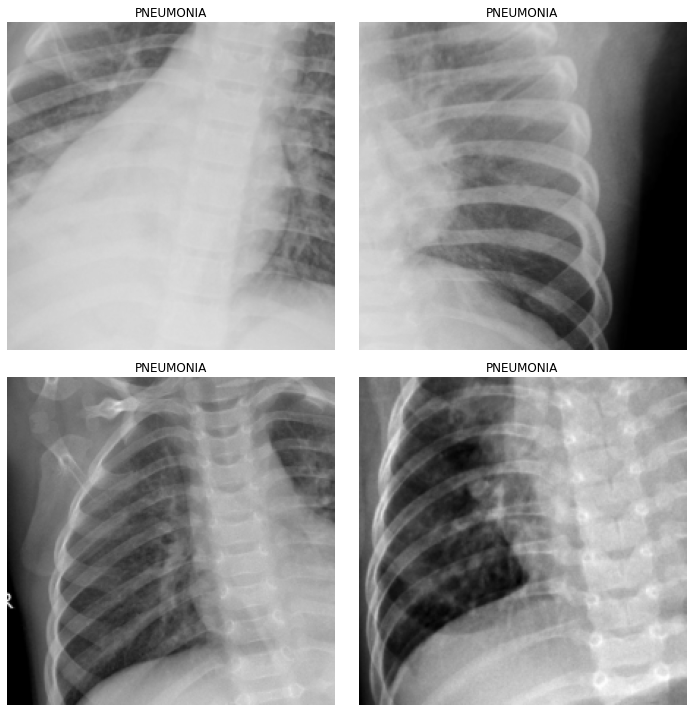

In [16]:
data.show_batch(2, figsize=(10,10))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.563557,0.577488,0.187500,22:03
1,0.345393,0.514610,0.312500,03:28
2,0.257453,0.273299,0.187500,03:26
3,0.200963,0.349141,0.187500,03:29
4,0.178285,0.501115,0.375000,03:33


In [8]:
learn.save('stage1')

In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


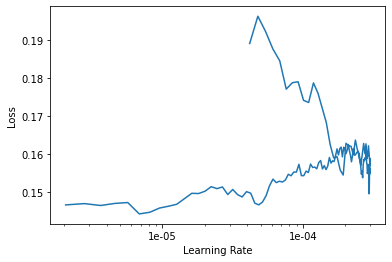

In [12]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.160617,0.185104,0.062500,03:31
1,0.145438,0.347199,0.187500,03:24


In [13]:
learn.save('stage2')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

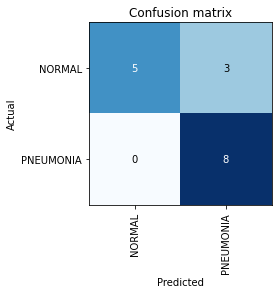

In [15]:
interp.plot_confusion_matrix()